# Analyse des données

In [709]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn import preprocessing

1 Partie qui est le client, context, Présenter les jeux de données
2 Expliquer les problématiques et la résolution employé. 
3 Les résultats pour orienter : Pivot table. 
Conclusion il faut parler de la taille du marché 
Prendre les données de référence. Comment évolue le nombre potentielle de client en x les années et en y 
1 Slide Sur le 10 pays comment va évoluer le marché 

3 Qu'est ce que j'ai appris, quelles ont été les difficultés rencontrées, Les axes d'améliorations

In [710]:
data = pd.read_csv('data_clean.csv')
data2013 = pd.read_csv('data_clean2013.csv')
data2014 = pd.read_csv('data_clean2014.csv')
data2015 = pd.read_csv('data_clean2015.csv')
data2016 = pd.read_csv('data_clean2016.csv')

In [711]:
data.dtypes

Country Name                                                                                    object
Enrolment in secondary education, both sexes (number)                                          float64
Enrolment in tertiary education, all programmes, both sexes (number)                           float64
GDP per capita (current US$)                                                                   float64
GNI per capita, PPP (current international $)                                                  float64
Internet users (per 100 people)                                                                float64
Population growth (annual %)                                                                   float64
Population of the official age for tertiary education, both sexes (number)                     float64
Population of the official entrance age to secondary general education, both sexes (number)    float64
Population, ages 15-64, total                                            

In [712]:
data.isna().mean(axis = 0)

Country Name                                                                                   0.000000
Enrolment in secondary education, both sexes (number)                                          0.042857
Enrolment in tertiary education, all programmes, both sexes (number)                           0.042857
GDP per capita (current US$)                                                                   0.014286
GNI per capita, PPP (current international $)                                                  0.042857
Internet users (per 100 people)                                                                0.000000
Population growth (annual %)                                                                   0.000000
Population of the official age for tertiary education, both sexes (number)                     0.028571
Population of the official entrance age to secondary general education, both sexes (number)    0.042857
Population, ages 15-64, total                                   

In [713]:
data['Market_size'] = data['Enrolment in secondary education, both sexes (number)'] + data['Enrolment in tertiary education, all programmes, both sexes (number)'] 
data.drop(columns=['Enrolment in secondary education, both sexes (number)','Enrolment in tertiary education, all programmes, both sexes (number)'],inplace=True)
data2013['Market_size_2013'] = data2013['Enrolment in secondary education, both sexes (number)'] + data2013['Enrolment in tertiary education, all programmes, both sexes (number)'] 
data2013.drop(columns=['Enrolment in secondary education, both sexes (number)','Enrolment in tertiary education, all programmes, both sexes (number)'],inplace=True)
data2014['Market_size_2014'] = data2014['Enrolment in secondary education, both sexes (number)'] + data2014['Enrolment in tertiary education, all programmes, both sexes (number)'] 
data2014.drop(columns=['Enrolment in secondary education, both sexes (number)','Enrolment in tertiary education, all programmes, both sexes (number)'],inplace=True)
data2015['Market_size_2015'] = data2015['Enrolment in secondary education, both sexes (number)'] + data2015['Enrolment in tertiary education, all programmes, both sexes (number)'] 
data2015.drop(columns=['Enrolment in secondary education, both sexes (number)','Enrolment in tertiary education, all programmes, both sexes (number)'],inplace=True)
data2016['Market_size_2016'] = data2016['Enrolment in secondary education, both sexes (number)'] + data2016['Enrolment in tertiary education, all programmes, both sexes (number)'] 
data2016.drop(columns=['Enrolment in secondary education, both sexes (number)','Enrolment in tertiary education, all programmes, both sexes (number)'],inplace=True)

# Corrélation des variables

,Country Name,GDP per capita (current US$),"GNI per capita, PPP (current international $)","Illiterate population, 25-64 years, both sexes (number)",Internet users (per 100 people),Population growth (annual %),"Population of the official age for tertiary education, both sexes (number)","Population of the official entrance age to secondary general education, both sexes (number)","Population, ages 15-64, total","Unemployment, total (% of total labor force)",Market_size_2013
0,Albania,4413.081697,10610.000000,1.068949e+05,57.2000,-0.183211,276635.0,44632.000000,1987352.0,15.600000,5.193940e+05
1,Algeria,5471.123389,13420.000000,2.542989e+05,22.5000,2.036092,3687770.0,565250.000000,25457105.0,9.800000,1.506878e+06
2,Argentina,12976.636425,19730.000000,1.584865e+06,59.9000,1.047277,3460839.0,704549.000000,27153851.0,7.100000,7.174257e+06
3,Armenia,3843.591213,8490.000000,7.600210e+04,41.9000,0.401252,266000.0,456052.900251,2014206.0,16.200001,3.676350e+05
4,Austria,50719.388277,48050.000000,2.456260e+05,80.6188,0.584104,525930.0,82865.000000,5703424.0,5.300000,1.129280e+06
...,...,...,...,...,...,...,...,...,...,...,...
70,United Kingdom,42724.067884,38780.000000,1.792953e+06,89.8441,0.669534,4195874.0,696864.000000,41637474.0,7.500000,8.883172e+06
71,Uruguay,16881.205676,19290.000000,2.105013e+04,57.6900,0.330004,263525.0,50733.000000,2179148.0,6.400000,4.795850e+05
72,Uzbekistan,1907.551233,5540.000000,0.000000e+00,26.8000,1.561904,3077969.0,501474.000000,20398036.0,9.000000,4.455175e+06
73,West Bank and Gaza,2992.200995,196257.659043,5.870249e+04,46.6000,2.984616,470260.0,110080.000000,2343175.0,23.400000,9.195470e+05


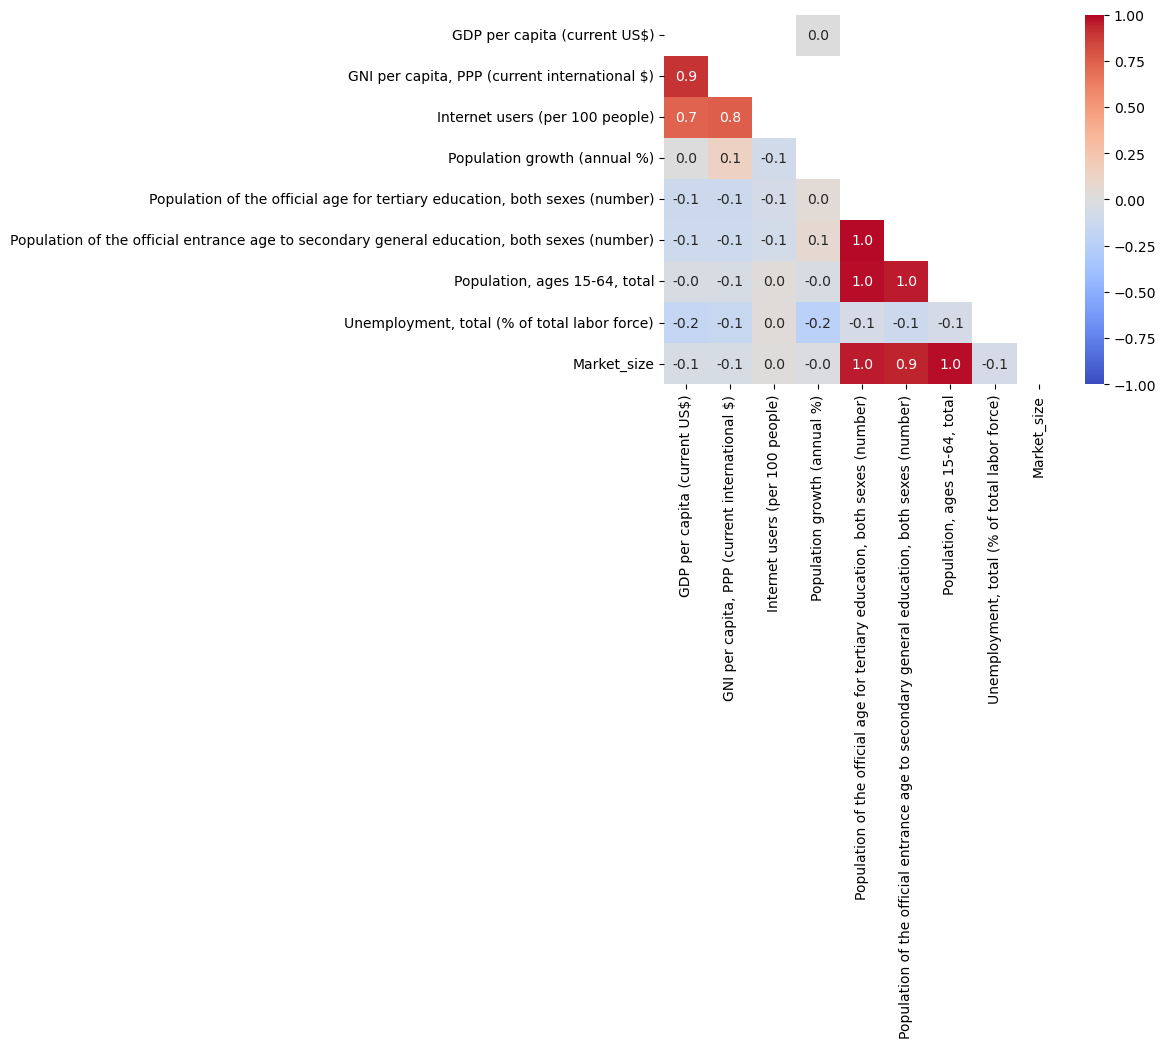

In [714]:
corr = data.corr().round(2)
mask = np.triu(corr)
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.1f',mask = mask)
data2013

In [769]:
cols = ['Country Name', 
       'GDP per capita (current US$)',
       'Internet users (per 100 people)',
       'Population growth (annual %)',
       'Market_size',
       'Unemployment, total (% of total labor force)']
data = data.loc[:,cols]

In [716]:
# Filtre les données
cols = ['Country Name', 
       'GDP per capita (current US$)',
       'Internet users (per 100 people)',
       'Population growth (annual %)',
       'Market_size_2013',
       'Unemployment, total (% of total labor force)']
data2013 = data2013.loc[:,cols]
data2013['Market_size_2013'].min()
cols = ['Country Name', 
       'GDP per capita (current US$)',
       'Internet users (per 100 people)',
       'Population growth (annual %)',
       'Market_size_2014',
       'Unemployment, total (% of total labor force)']
data2014 = data2014.loc[:,cols]
data2014['Market_size_2014'].min()
cols = ['Country Name', 
       'GDP per capita (current US$)',
       'Internet users (per 100 people)',
       'Population growth (annual %)',
       'Market_size_2015',
       'Unemployment, total (% of total labor force)']
data2015 = data2015.loc[:,cols]

data2015['Market_size_2015'].min()
cols = ['Country Name', 
       'GDP per capita (current US$)',
       'Internet users (per 100 people)',
       'Population growth (annual %)',
       'Market_size_2016',
       'Unemployment, total (% of total labor force)']
data2016['Market_size_2016'].min()
data2016 = data2016.loc[:,cols]

<AxesSubplot:>

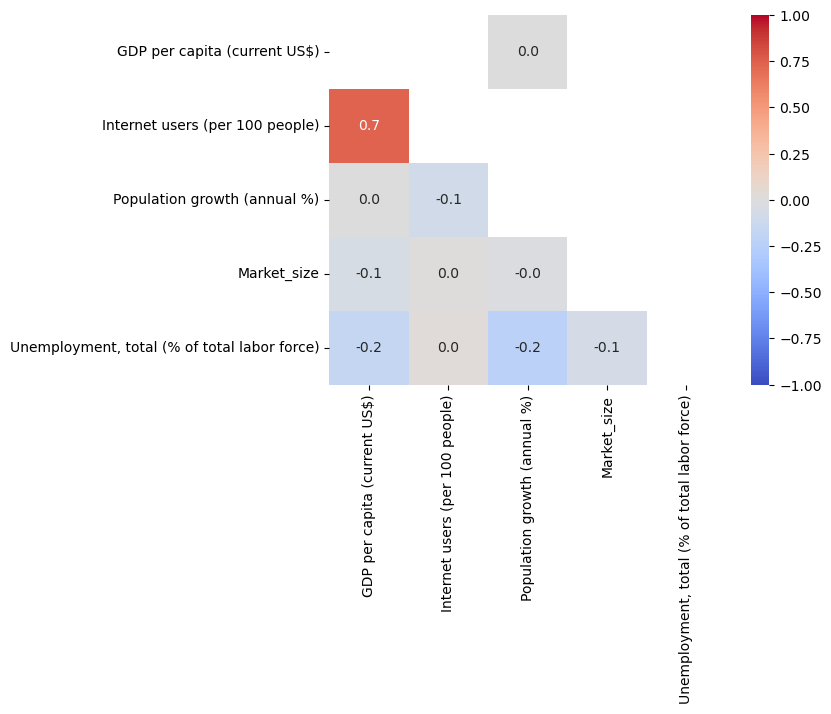

In [717]:
corr = data.corr().round(2)
mask = np.triu(corr)
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.1f',mask = mask)

In [718]:
data.isna().mean(axis = 1)

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.166667
        ...   
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
Length: 70, dtype: float64

In [719]:
data.describe()

,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),Market_size,"Unemployment, total (% of total labor force)"
count,69.000000,70.000000,70.000000,6.500000e+01,70.000000
mean,17942.200431,58.658107,1.063077,3.070536e+06,8.836071
std,20367.720801,22.081195,1.425630,5.075067e+06,5.671668
min,991.855332,13.696775,-2.563620,1.123540e+05,0.225000
25%,4052.001824,46.448172,0.141803,6.692020e+05,5.275000
50%,10412.669117,60.060016,0.964678,1.138951e+06,7.550000
75%,22521.452369,75.116728,1.658123,2.784934e+06,10.287500
max,86423.123604,96.365476,6.115165,3.216895e+07,26.800000


## Scale 

In [720]:
data.describe()

,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),Market_size,"Unemployment, total (% of total labor force)"
count,69.000000,70.000000,70.000000,6.500000e+01,70.000000
mean,17942.200431,58.658107,1.063077,3.070536e+06,8.836071
std,20367.720801,22.081195,1.425630,5.075067e+06,5.671668
min,991.855332,13.696775,-2.563620,1.123540e+05,0.225000
25%,4052.001824,46.448172,0.141803,6.692020e+05,5.275000
50%,10412.669117,60.060016,0.964678,1.138951e+06,7.550000
75%,22521.452369,75.116728,1.658123,2.784934e+06,10.287500
max,86423.123604,96.365476,6.115165,3.216895e+07,26.800000


In [721]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,QuantileTransformer

In [722]:
X = data.select_dtypes(np.number)
scaller = MinMaxScaler()
scaller.fit(X)
X_minmax = pd.DataFrame(scaller.transform(X),columns=data.select_dtypes(np.number).columns)
X_minmax.describe().round(2)

,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),Market_size,"Unemployment, total (% of total labor force)"
count,69.00,70.00,70.00,65.00,70.00
mean,0.20,0.54,0.42,0.09,0.32
std,0.24,0.27,0.16,0.16,0.21
min,0.00,0.00,0.00,0.00,0.00
25%,0.04,0.40,0.31,0.02,0.19
50%,0.11,0.56,0.41,0.03,0.28
75%,0.25,0.74,0.49,0.08,0.38
max,1.00,1.00,1.00,1.00,1.00


In [723]:
X = data2013.select_dtypes(np.number)
scaller = MinMaxScaler()
scaller.fit(X)
X_minmax2013 = pd.DataFrame(scaller.transform(X),columns=data2013.select_dtypes(np.number).columns)
X_minmax2013.describe().round(2)

,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),Market_size_2013,"Unemployment, total (% of total labor force)"
count,75.00,75.00,75.00,75.00,75.00
mean,0.05,0.52,0.42,0.09,0.33
std,0.16,0.27,0.17,0.15,0.22
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.32,0.32,0.02,0.18
50%,0.01,0.53,0.41,0.04,0.28
75%,0.03,0.73,0.47,0.08,0.44
max,1.00,1.00,1.00,1.00,1.00


In [724]:
X = data2014.select_dtypes(np.number)
scaller = MinMaxScaler()
scaller.fit(X)
X_minmax2014 = pd.DataFrame(scaller.transform(X),columns=data2014.select_dtypes(np.number).columns)

In [725]:
X = data2015.select_dtypes(np.number)
scaller = MinMaxScaler()
scaller.fit(X)
X_minmax2015 = pd.DataFrame(scaller.transform(X),columns=data2015.select_dtypes(np.number).columns)

In [726]:
X = data2016.select_dtypes(np.number)
scaller = MinMaxScaler()
scaller.fit(X)
X_minmax2016 = pd.DataFrame(scaller.transform(X),columns=data2016.select_dtypes(np.number).columns)

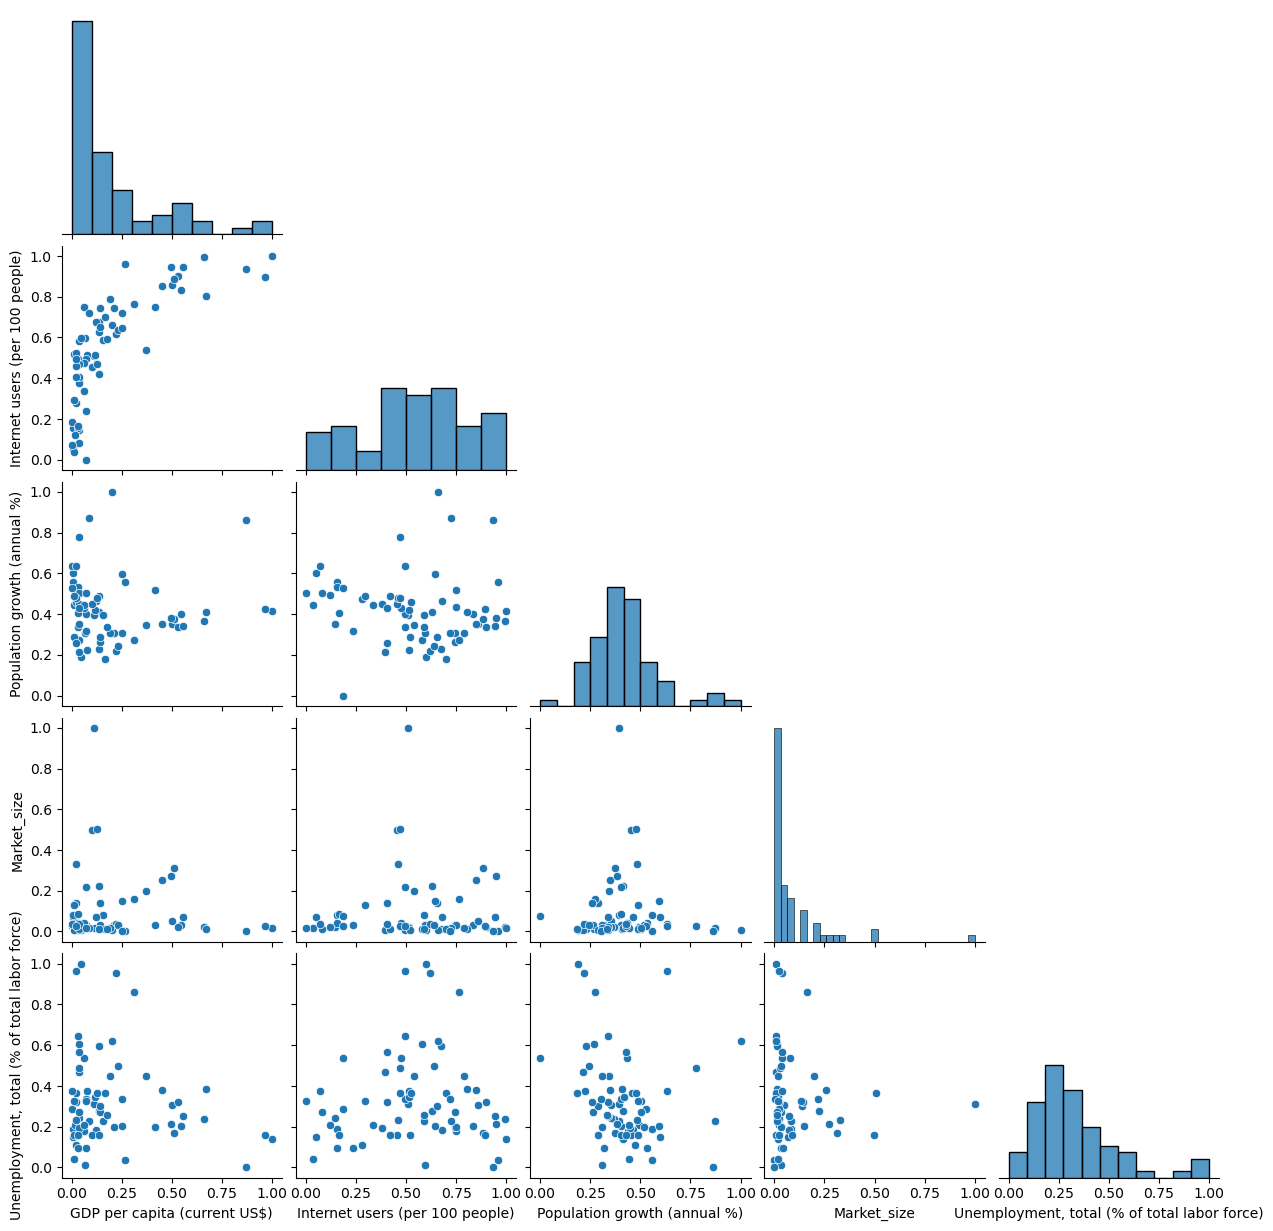

In [728]:
sns.pairplot(X_minmax, corner = True)

In [729]:
X = data.select_dtypes(np.number)
scaller = StandardScaler()
scaller.fit(X)
X_std = pd.DataFrame(scaller.transform(X),columns=data.select_dtypes(np.number).columns)
X_std.describe().round(2)

,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),Market_size,"Unemployment, total (% of total labor force)"
count,69.00,70.00,70.00,65.00,70.00
mean,0.00,-0.00,-0.00,-0.00,-0.00
std,1.01,1.01,1.01,1.01,1.01
min,-0.84,-2.05,-2.56,-0.59,-1.53
25%,-0.69,-0.56,-0.65,-0.48,-0.63
50%,-0.37,0.06,-0.07,-0.38,-0.23
75%,0.23,0.75,0.42,-0.06,0.26
max,3.39,1.72,3.57,5.78,3.19


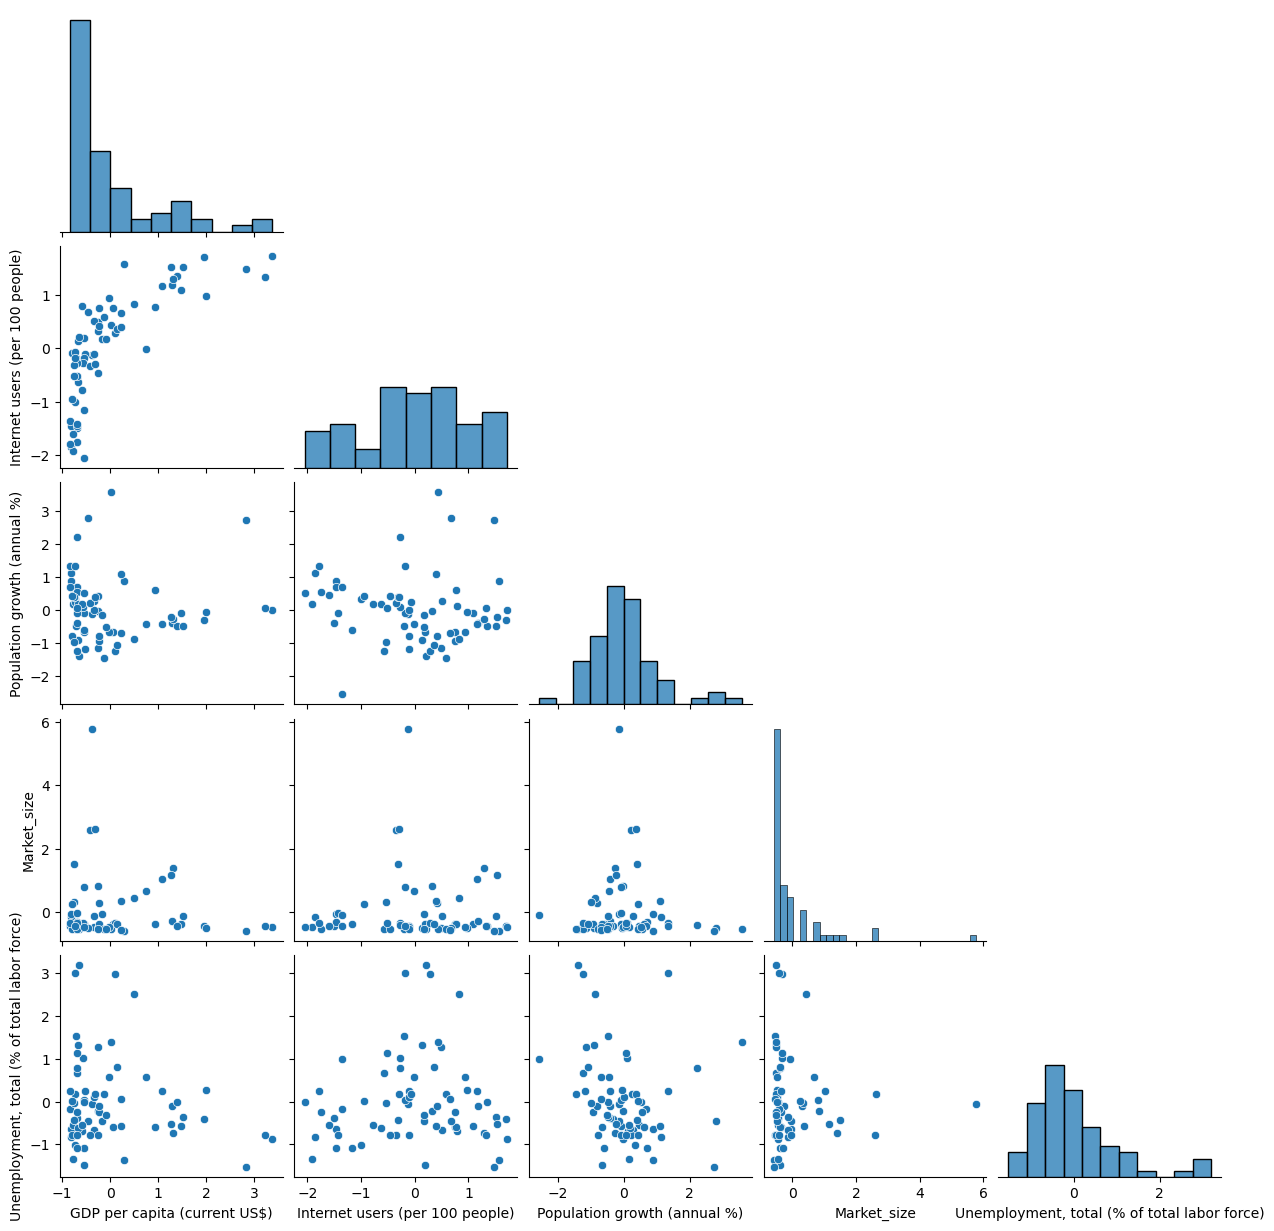

In [730]:
sns.pairplot(X_std,corner = True)

In [807]:
X_minmax['Score'] = X_minmax.sum(axis=1)
data_scale = pd.concat([data.select_dtypes(exclude=np.number),X_minmax],axis = 1)
top10 = data_scale.sort_values('Score',ascending=False).head(10)
top10 = top10.loc[:,['Country Name','Score']]
pays_top10 = top10['Country Name'].values
pays_top10

array([['Qatar', 'Norway', 'Oman', 'Switzerland', 'Spain', 'Brazil',
        'United Kingdom', 'France', 'Denmark', 'Ireland']], dtype=object)

In [ ]:
# Moyenne des pays ayant 

In [ ]:
#2 options personne et GDP 
#min max 

In [732]:
X_minmax2013['Score2013'] = X_minmax2013.sum(axis=1)
data_scale2013 = pd.concat([data2013.select_dtypes(exclude=np.number),X_minmax2013],axis = 1)
pays = data_scale2013['Country Name'].isin(['Qatar', 'Norway', 'Oman', 'Switzerland', 'Spain', 'Brazil',
       'United Kingdom', 'France', 'Denmark', 'Ireland'])
data_scale2013 = data_scale2013.loc[pays,:]

,Country Name,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),Market_size_2013,"Unemployment, total (% of total labor force)"
11,Brazil,12216.904464,51.0400,0.917023,32422494.0,7.100000
20,Denmark,61191.192626,94.6297,0.416901,846425.0,7.000000
24,France,42554.122054,81.9198,0.514636,8251984.0,10.400000
33,Ireland,52060.467861,78.2477,0.248160,557356.2,13.000000
48,Norway,103059.248228,95.0534,1.209142,697979.0,3.400000
49,Oman,21268.756374,66.4500,6.882110,397911.0,17.299999
57,Qatar,88304.879575,85.3000,6.465723,99908.0,0.300000
62,Spain,29211.773746,71.6350,-0.327669,5265772.0,26.100000
64,Switzerland,85112.464398,86.3400,1.149880,896832.0,4.400000
70,United Kingdom,42724.067884,89.8441,0.669534,8883172.0,7.500000


In [733]:
X_minmax2014['Score2014'] = X_minmax2014.sum(axis=1)
data_scale2014 = pd.concat([data2014.select_dtypes(exclude=np.number),X_minmax2014],axis = 1)
pays = data_scale2014['Country Name'].isin(['Qatar', 'Norway', 'Oman', 'Switzerland', 'Spain', 'Brazil',
       'United Kingdom', 'France', 'Denmark', 'Ireland'])
data_scale2014 = data_scale2014.loc[pays,:]
data_scale2014

,Country Name,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),Market_size_2014,"Unemployment, total (% of total labor force)",Score2014
11,Brazil,0.011464,0.535089,0.415610,1.000000,0.241758,2.203921
20,Denmark,0.064240,0.996548,0.376022,0.024649,0.234432,1.695891
24,France,0.043772,0.860245,0.375691,0.256712,0.369963,1.906384
33,Ireland,0.057293,0.815033,0.366013,0.015245,0.406593,1.660178
48,Norway,0.100436,1.000000,0.440597,0.019942,0.120879,1.681854
49,Oman,0.020272,0.709577,1.000000,0.013379,0.604396,2.347623
57,Qatar,0.089627,0.946437,0.881041,0.001648,0.000000,1.918753
62,Spain,0.029845,0.776058,0.292167,0.161618,0.886447,2.146135
64,Switzerland,0.089369,0.900891,0.450206,0.026216,0.157509,1.624191
70,United Kingdom,0.047771,0.947773,0.401646,0.274513,0.216117,1.887820


In [734]:
X_minmax2015['Score2015'] = X_minmax2015.sum(axis=1)
data_scale2015 = pd.concat([data2015.select_dtypes(exclude=np.number),X_minmax2015],axis = 1)
pays = data_scale2015['Country Name'].isin(['Qatar', 'Norway', 'Oman', 'Switzerland', 'Spain', 'Brazil',
       'United Kingdom', 'France', 'Denmark', 'Ireland'])
data_scale2015 = data_scale2015.loc[pays,:]
data_scale2015

,Country Name,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),Market_size_2015,"Unemployment, total (% of total labor force)",Score2015
11,Brazil,0.009146,0.567178,0.398923,1.000000,0.318008,2.293255
20,Denmark,0.060734,0.994604,0.381339,0.026520,0.229885,1.693082
24,France,0.041517,0.863730,0.349261,0.107528,0.390805,1.752841
33,Ireland,0.071373,0.812306,0.450578,0.017147,0.352490,1.703895
48,Norway,0.085807,1.000000,0.416017,0.021429,0.157088,1.680341
49,Oman,0.018321,0.654973,1.000000,0.012253,0.609195,2.294741
57,Qatar,0.076277,0.955849,0.826580,0.003110,0.000000,1.861815
62,Spain,0.028999,0.796191,0.287893,0.165364,0.839080,2.117527
64,Switzerland,0.094543,0.895049,0.433226,0.027840,0.164751,1.615408
70,United Kingdom,0.050584,0.945901,0.391976,0.162178,0.195402,1.746042


In [735]:
X_minmax2016['Score2016'] = X_minmax2016.sum(axis=1)
data_scale2016 = pd.concat([data2016.select_dtypes(exclude=np.number),X_minmax2016],axis = 1)
pays = data_scale2016['Country Name'].isin(['Qatar', 'Norway', 'Oman', 'Switzerland', 'Spain', 'Brazil',
       'United Kingdom', 'France', 'Denmark', 'Ireland'])
data_scale2016 = data_scale2016.loc[pays,:]
data_scale2016

,Country Name,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),Market_size_2016,"Unemployment, total (% of total labor force)",Score2016
11,Brazil,0.003423,0.566539,0.358255,1.000000,0.421642,2.349859
20,Denmark,0.023393,0.988323,0.360746,0.023525,0.223881,1.619868
24,France,0.015968,0.859977,0.298448,0.257406,0.369403,1.801203
33,Ireland,0.027979,0.820921,0.536154,0.014461,0.287313,1.686829
48,Norway,0.031115,0.992061,0.363073,0.018831,0.167910,1.572990
49,Oman,0.006240,0.681162,1.000000,0.010683,0.608209,2.306294
57,Qatar,0.025961,0.958044,0.748759,0.002105,0.000000,1.734869
62,Spain,0.011424,0.802727,0.237844,0.162322,0.723881,1.938198
64,Switzerland,0.035108,0.902776,0.396126,0.025993,0.164179,1.524183
70,United Kingdom,0.017518,0.963527,0.352419,0.273666,0.171642,1.778771


In [736]:
Data_score =  data_scale2013.loc[pays,['Country Name','Score2013']]
Data_score['Score2014'] = data_scale2014['Score2014']
Data_score['Score2015'] = data_scale2015['Score2015']
Data_score['Score2016'] = data_scale2016['Score2016']
Data_score = Data_score.reset_index()
Data_score = Data_score.drop(columns='index')
Data_score

,Country Name,Score2013,Score2014,Score2015,Score2016
0,Brazil,2.165109,2.203921,2.293255,2.349859
1,Denmark,1.677228,1.695891,1.693082,1.619868
2,France,1.878124,1.906384,1.752841,1.801203
3,Ireland,1.679751,1.660178,1.703895,1.686829
4,Norway,1.670760,1.681854,1.680341,1.572990
5,Oman,2.323680,2.347623,2.294741,2.306294
6,Qatar,1.933595,1.918753,1.861815,1.734869
7,Spain,2.150355,2.146135,2.117527,1.938198
8,Switzerland,1.590643,1.624191,1.615408,1.524183
9,United Kingdom,1.894608,1.887820,1.746042,1.778771


<AxesSubplot:title={'center':'Taille du marché'}, xlabel='Country Name'>

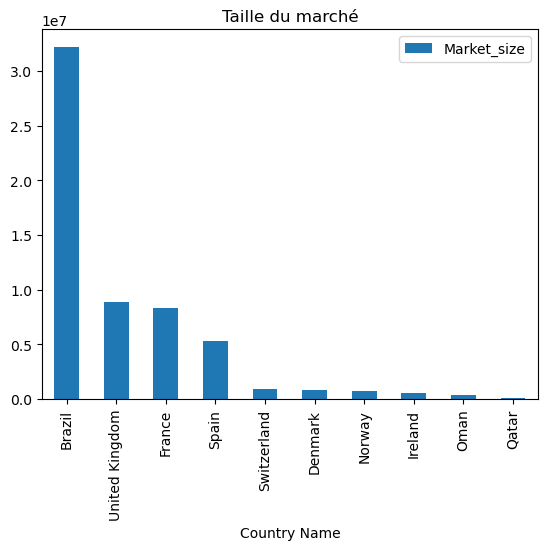

In [800]:
pays_top10 = top10['Country Name']
mask = data['Country Name'].isin(pays_top10)

data_market_size = data.loc[mask,:]
data_market_size = data_market_size.sort_values('Market_size',ascending=False)

data_market_size.plot(kind='bar', x = 'Country Name', y = 'Market_size',title='Taille du marché')


Text(0.5, 1.0, 'EVOLUTION DU SCORE PAR ANNEE')

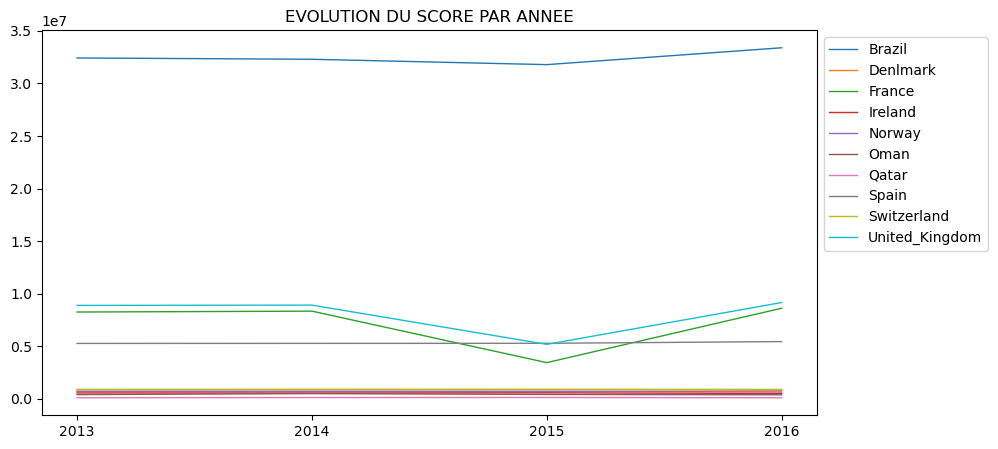

In [839]:
fig, ax = plt.subplots(figsize=(10, 5))
Brazil = Evolution_Market.iloc[0:1,1:].values
Brazil = Brazil.reshape(4)
ax.plot([2013,2014,2015,2016], Brazil , linewidth=1, label='Brazil')
Denmark = Evolution_Market.iloc[1:2,1:].values
Denmark = Denmark.reshape(4)
ax.plot([2013,2014,2015,2016], Denmark , linewidth=1, label='Denlmark')
France = Evolution_Market.iloc[2:3,1:].values
France = France.reshape(4)
ax.plot([2013,2014,2015,2016], France , linewidth=1, label='France')
Ireland = Evolution_Market.iloc[3:4,1:].values
Ireland = Ireland.reshape(4)
ax.plot([2013,2014,2015,2016], Ireland , linewidth=1, label='Ireland')
Norway = Evolution_Market.iloc[4:5,1:].values
Norway = Norway.reshape(4)
ax.plot([2013,2014,2015,2016], Norway , linewidth=1, label='Norway')
Oman = Evolution_Market.iloc[5:6,1:].values
Oman = Oman.reshape(4)
ax.plot([2013,2014,2015,2016], Oman , linewidth=1, label='Oman')
Qatar = Evolution_Market.iloc[6:7,1:].values
Qatar = Qatar.reshape(4)
ax.plot([2013,2014,2015,2016], Qatar , linewidth=1, label='Qatar')
Spain = Evolution_Market.iloc[7:8,1:].values
Spain = Spain.reshape(4)
ax.plot([2013,2014,2015,2016], Spain , linewidth=1, label='Spain')
Switzerland = Evolution_Market.iloc[8:9,1:].values
Switzerland = Switzerland.reshape(4)
ax.plot([2013,2014,2015,2016], Switzerland , linewidth=1, label='Switzerland')
United_Kingdom = Evolution_Market.iloc[9:10,1:].values
United_Kingdom = United_Kingdom.reshape(4)
ax.plot([2013,2014,2015,2016], United_Kingdom , linewidth=1, label='United_Kingdom')
ax.set_xticks(range(2013,2017))
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("EVOLUTION DU SCORE PAR ANNEE")

In [833]:
Evolution_Market.plot()

,Country Name,Market_size_2013,Market_size_2014,Market_size_2015,Market_size_2016
11,Brazil,32422494.0,32297090,31787259,33390331
20,Denmark,846425.0,855190,867019,809916
24,France,8251984.0,8336092,3440023,8613435
33,Ireland,557356.2,552028,569302,507492
48,Norway,697979.0,703457,705305,653300
49,Oman,397911.0,491880,413847,381428
57,Qatar,99908.0,113721,123433,95224
62,Spain,5265772.0,5270586,5277051,5440914
64,Switzerland,896832.0,905697,908920,892265
70,United Kingdom,8883172.0,8909924,5175871,9155937


In [831]:
mask = data2013['Country Name'].isin(pays_top10)
mask2 = data2014['Country Name'].isin(pays_top10)
mask3 = data2015['Country Name'].isin(pays_top10)
mask4 = data2016['Country Name'].isin(pays_top10)

data2014 = data2014.loc[mask2,['Country Name','Market_size_2014']]
data2015 = data2015.loc[mask3,['Country Name','Market_size_2015']]
data2016 = data2016.loc[mask3,['Country Name','Market_size_2016']]

Evolution_Market = data2013.loc[mask,['Country Name','Market_size_2013']]
Evolution_Market['Market_size_2014'] = data2014['Market_size_2014'].astype(int)
Evolution_Market['Market_size_2015'] = data2015['Market_size_2015'].astype(int)
Evolution_Market['Market_size_2016'] = data2016['Market_size_2016'].astype(int)
Evolution_Market

,Country Name,Market_size_2013,Market_size_2014,Market_size_2015,Market_size_2016
11,Brazil,32422494.0,32297090,31787259,33390331
20,Denmark,846425.0,855190,867019,809916
24,France,8251984.0,8336092,3440023,8613435
33,Ireland,557356.2,552028,569302,507492
48,Norway,697979.0,703457,705305,653300
49,Oman,397911.0,491880,413847,381428
57,Qatar,99908.0,113721,123433,95224
62,Spain,5265772.0,5270586,5277051,5440914
64,Switzerland,896832.0,905697,908920,892265
70,United Kingdom,8883172.0,8909924,5175871,9155937


In [758]:
# Top 10 pays avec 
X_std['Score'] = X_std.sum(axis=1)
data_scale2 = pd.concat([data.select_dtypes(exclude=np.number),X_std],axis = 1)
data_scale2.sort_values('Score',ascending=False).head(10)

,Country Name,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),Market_size,"Unemployment, total (% of total labor force)",Score
10,Brazil,-0.372388,-0.125790,-0.137304,5.778222,-0.064122,5.078618
53,Qatar,2.832150,1.474867,2.734603,-0.587421,-1.529223,4.924976
46,Oman,0.019389,0.433184,3.569346,-0.528984,1.387660,4.880595
45,Norway,3.386860,1.719999,-0.012321,-0.470283,-0.863268,3.760987
60,Switzerland,3.237649,1.322728,0.058858,-0.430257,-0.770034,3.418945
58,Spain,0.488311,0.826117,-0.875788,0.436985,2.524223,3.399848
66,United Kingdom,1.265922,1.523495,-0.222006,1.156901,-0.516971,3.207342
23,France,1.077202,1.155801,-0.421592,1.037258,0.259976,3.108645
25,Germany,1.313061,1.288201,-0.265464,1.394117,-0.730077,2.999838
69,West Bank and Gaza,-0.741937,-0.179719,1.324649,-0.425379,3.012590,2.990205


In [760]:
data_scale2.sort_values('Score',ascending=False).head(10)
# revoir le score

,Country Name,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),Market_size,"Unemployment, total (% of total labor force)",Score
10,Brazil,-0.372388,-0.125790,-0.137304,5.778222,-0.064122,5.078618
53,Qatar,2.832150,1.474867,2.734603,-0.587421,-1.529223,4.924976
46,Oman,0.019389,0.433184,3.569346,-0.528984,1.387660,4.880595
45,Norway,3.386860,1.719999,-0.012321,-0.470283,-0.863268,3.760987
60,Switzerland,3.237649,1.322728,0.058858,-0.430257,-0.770034,3.418945
58,Spain,0.488311,0.826117,-0.875788,0.436985,2.524223,3.399848
66,United Kingdom,1.265922,1.523495,-0.222006,1.156901,-0.516971,3.207342
23,France,1.077202,1.155801,-0.421592,1.037258,0.259976,3.108645
25,Germany,1.313061,1.288201,-0.265464,1.394117,-0.730077,2.999838
69,West Bank and Gaza,-0.741937,-0.179719,1.324649,-0.425379,3.012590,2.990205


## Fin du notebook